<a href="https://colab.research.google.com/github/HasankaRajakaruna/Kaggle-Projects/blob/main/LSTM_CodeTrading_1_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_ta as ta

In [6]:
data = pd.read_csv('/content/drive/MyDrive/Dataset/dataset_audusd_train.csv')

In [7]:
data

,time,Unnamed: 0,open,high,low,close,tick_volume,spread,real_volume,target
0,2010-01-04 00:00:00,0,0.89938,0.89953,0.89372,0.89613,5892,30,0,2
1,2010-01-04 04:00:00,1,0.89611,0.89842,0.89479,0.89822,3407,15,0,2
2,2010-01-04 08:00:00,2,0.89821,0.90669,0.89754,0.90439,7643,20,0,2
3,2010-01-04 12:00:00,3,0.90442,0.90892,0.90421,0.90824,6268,15,0,2
4,2010-01-04 16:00:00,4,0.90823,0.91350,0.90758,0.91239,7003,15,0,2
...,...,...,...,...,...,...,...,...,...,...
21710,2023-12-29 04:00:00,1549,0.68414,0.68464,0.68288,0.68428,5127,0,0,2
21711,2023-12-29 08:00:00,1550,0.68429,0.68460,0.68046,0.68046,6837,0,0,2
21712,2023-12-29 12:00:00,1551,0.68046,0.68061,0.67823,0.67836,8288,0,0,2
21713,2023-12-29 16:00:00,1552,0.67836,0.68389,0.67812,0.68352,13982,0,0,2


In [8]:
# Adding indicators
data['RSI']=ta.rsi(data.close, length=15)
data['EMAF']=ta.ema(data.close, length=20)
data['EMAM']=ta.ema(data.close, length=100)
data['EMAS']=ta.ema(data.close, length=150)

data['Target'] = data['close']-data.open
data['Target'] = data['Target'].shift(-1)

data['TargetClass'] = [1 if data.Target[i]>0 else 0 for i in range(len(data))]

data['TargetNextClose'] = data['close'].shift(-1)

data.dropna(inplace=True)
data.reset_index(inplace = True)
data.drop(['close', 'time', 'tick_volume','spread', 'real_volume', 'target'], axis=1, inplace=True)

In [9]:
data_set = data.iloc[:, 0:11]#.values
pd.set_option('display.max_columns', None)

data_set.head(20)
#print(data_set.shape)
#print(data.shape)
#print(type(data_set))

,index,Unnamed: 0,open,high,low,RSI,EMAF,EMAM,EMAS,Target,TargetClass
0,149,149,0.85807,0.86823,0.85793,40.162474,0.873601,0.895291,0.906485,-0.00271,0
1,150,150,0.86794,0.86832,0.86413,37.787785,0.872804,0.894696,0.905939,-0.00066,0
2,151,151,0.86526,0.86653,0.86427,37.278264,0.872023,0.894100,0.905391,0.00333,1
3,152,152,0.86457,0.87051,0.86422,41.690770,0.871630,0.893581,0.904895,-0.00008,0
4,153,153,0.86789,0.86886,0.86509,41.605242,0.871266,0.893071,0.904403,-0.00031,0
5,154,154,0.86783,0.87081,0.86649,41.312646,0.870910,0.892565,0.903915,-0.00436,0
6,155,155,0.86751,0.86851,0.86135,37.100118,0.870171,0.891982,0.903375,0.00200,1
7,156,156,0.86313,0.86671,0.86268,40.066821,0.869690,0.891450,0.902868,0.00530,1
8,157,157,0.86516,0.87062,0.86451,47.243529,0.869764,0.891035,0.902439,0.00021,1
9,158,158,0.87043,0.87360,0.86965,47.471124,0.869847,0.890631,0.902018,0.00287,1


In [ ]:
#Target column Categories
#y =[1 if data.Open[i]>data.Close[i] else 0 for i in range(0, len(data))]
#yi = [data.Open[i]-data.Close[i] for i in range(0, len(data))]
#print(yi)
#print(len(yi))

In [10]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
data_set_scaled = sc.fit_transform(data_set)
print(data_set_scaled)

[[0.00000000e+00 9.56354300e-02 5.48958124e-01 ... 6.25020409e-01
  4.19080659e-01 0.00000000e+00]
 [4.63735856e-05 9.62772786e-02 5.66951671e-01 ... 6.23839508e-01
  4.54640069e-01 0.00000000e+00]
 [9.27471712e-05 9.69191271e-02 5.62065885e-01 ... 6.22656216e-01
  5.23850824e-01 1.00000000e+00]
 ...
 [9.99907253e-01 9.94865212e-01 2.32147740e-01 ... 1.09695729e-01
  4.29661752e-01 0.00000000e+00]
 [9.99953626e-01 9.95507060e-01 2.25165442e-01 ... 1.09991303e-01
  5.55594102e-01 1.00000000e+00]
 [1.00000000e+00 9.96148909e-01 2.21337028e-01 ... 1.10430663e-01
  4.12315698e-01 0.00000000e+00]]


In [11]:
# multiple feature from data provided to the model
X = []
#print(data_set_scaled[0].size)
#data_set_scaled=data_set.values
backcandles = 30
print(data_set_scaled.shape[0])
for j in range(8):#data_set_scaled[0].size):#2 columns are target not X
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]):#backcandles+2
        X[j].append(data_set_scaled[i-backcandles:i, j])

#move axis from 0 to position 2
X=np.moveaxis(X, [0], [2])

#Erase first elements of y because of backcandles to match X length
#del(yi[0:backcandles])
#X, yi = np.array(X), np.array(yi)
# Choose -1 for last column, classification else -2...
X, yi =np.array(X), np.array(data_set_scaled[backcandles:,-1])
y=np.reshape(yi,(len(yi),1))
#y=sc.fit_transform(yi)
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X)
print(X.shape)
print(y)
print(y.shape)

21565
[[[0.00000000e+00 9.56354300e-02 5.48958124e-01 ... 3.55904270e-01
   5.62177910e-01 6.00633869e-01]
  [4.63735856e-05 9.62772786e-02 5.66951671e-01 ... 3.25519070e-01
   5.60633595e-01 5.99379370e-01]
  [9.27471712e-05 9.69191271e-02 5.62065885e-01 ... 3.18999510e-01
   5.59120140e-01 5.98123422e-01]
  ...
  [1.25208681e-03 1.12965340e-01 6.08608463e-01 ... 4.80783596e-01
   5.78162871e-01 5.85605740e-01]
  [1.29846040e-03 1.13607189e-01 5.89521084e-01 ... 4.98935962e-01
   5.78134470e-01 5.85336153e-01]
  [1.34483398e-03 1.14249037e-01 5.91945746e-01 ... 5.46155496e-01
   5.78782105e-01 5.85224225e-01]]

 [[4.63735856e-05 9.62772786e-02 5.66951671e-01 ... 3.25519070e-01
   5.60633595e-01 5.99379370e-01]
  [9.27471712e-05 9.69191271e-02 5.62065885e-01 ... 3.18999510e-01
   5.59120140e-01 5.98123422e-01]
  [1.39120757e-04 9.75609756e-02 5.60807978e-01 ... 3.75459490e-01
   5.58359587e-01 5.97030060e-01]
  ...
  [1.29846040e-03 1.13607189e-01 5.89521084e-01 ... 4.98935962e-01
   5

In [ ]:
#also comprehensions for X
#X = np.array([data_set_scaled[i-backcandles:i,:4].copy() for i in range(backcandles,len(data_set_scaled))])
#print(X)
#print(X.shape)

In [12]:
# split data into train test sets
splitlimit = int(len(X)*0.8)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)

17228
(17228, 30, 8)
(4307, 30, 8)
(17228, 1)
(4307, 1)
[[0.]
 [0.]
 [1.]
 ...
 [0.]
 [0.]
 [1.]]


In [13]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import TimeDistributed

import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
import numpy as np
#tf.random.set_seed(20)
np.random.seed(10)

lstm_input = Input(shape=(backcandles, 8), name='lstm_input')
inputs = LSTM(150, name='first_layer')(lstm_input)
inputs = Dense(1, name='dense_layer')(inputs)
output = Activation('linear', name='output')(inputs)
model = Model(inputs=lstm_input, outputs=output)
adam = optimizers.Adam()
model.compile(optimizer=adam, loss='mse')
model.fit(x=X_train, y=y_train, batch_size=15, epochs=30, shuffle=True, validation_split = 0.1)

Epoch 1/30
1034/1034 [==============================] - 41s 38ms/step - loss: 0.2553 - val_loss: 0.2495
Epoch 2/30
1034/1034 [==============================] - 38s 37ms/step - loss: 0.2519 - val_loss: 0.2491
Epoch 3/30
1034/1034 [==============================] - 35s 34ms/step - loss: 0.2511 - val_loss: 0.2503
Epoch 4/30
1034/1034 [==============================] - 37s 36ms/step - loss: 0.2509 - val_loss: 0.2489
Epoch 5/30
1034/1034 [==============================] - 35s 34ms/step - loss: 0.2507 - val_loss: 0.2497
Epoch 6/30
1034/1034 [==============================] - 37s 36ms/step - loss: 0.2508 - val_loss: 0.2518
Epoch 7/30
1034/1034 [==============================] - 41s 40ms/step - loss: 0.2506 - val_loss: 0.2508
Epoch 8/30
1034/1034 [==============================] - 35s 34ms/step - loss: 0.2506 - val_loss: 0.2515
Epoch 9/30
1034/1034 [==============================] - 36s 35ms/step - loss: 0.2504 - val_loss: 0.2534
Epoch 10/30
1034/1034 [==============================] - 34s 33m

In [14]:
y_pred = model.predict(X_test)
#y_pred=np.where(y_pred > 0.43, 1,0)
for i in range(10):
    print(y_pred[i], y_test[i])

135/135 [==============================] - 3s 16ms/step
[0.49638578] [1.]
[0.49624097] [1.]
[0.4924137] [1.]
[0.48854864] [0.]
[0.4881598] [1.]
[0.4888148] [1.]
[0.48520905] [0.]
[0.48362333] [1.]
[0.48815134] [0.]
[0.48457476] [1.]


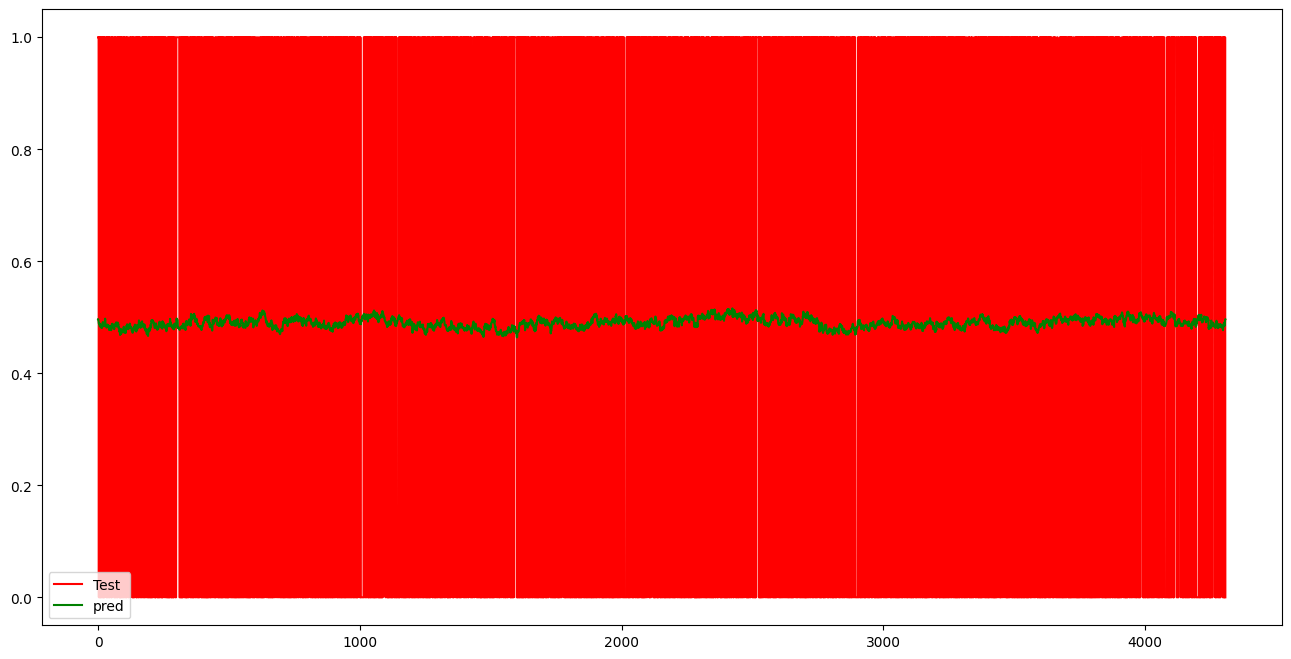

In [16]:
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'red', label = 'Test')
plt.plot(y_pred, color = 'green', label = 'pred')
plt.legend()
plt.show()

In [17]:
y_test

array([[1.],
       [1.],
       [1.],
       ...,
       [0.],
       [1.],
       [0.]])